In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import*

In [ ]:
df = pd.read_csv('/content/df.csv')

In [ ]:
df.head()

,Glu 4h,Glu 24h
0,15.8,12.0
1,15.2,12.9
2,14.9,11.2
3,11.7,12.0
4,12.4,12.7


In [ ]:
df = df.rename(columns={'Glu 4h':'Glu_4h','Glu 24h':'Glu_24h'})

In [ ]:
df.head()

,Glu_4h,Glu_24h
0,15.8,12.0
1,15.2,12.9
2,14.9,11.2
3,11.7,12.0
4,12.4,12.7


In [ ]:
import seaborn as sns

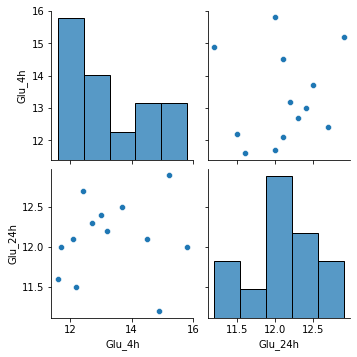

In [ ]:
sns.pairplot(df)

In [ ]:
dglu = df['Glu_4h']
dglu2 = df['Glu_24h']

In [ ]:
dglu.describe()

count    13.000000
mean     13.307692
std       1.396103
min      11.600000
25%      12.200000
50%      13.000000
75%      14.500000
max      15.800000
Name: Glu_4h, dtype: float64

In [ ]:
dglu2.describe()

count    13.000000
mean     12.115385
std       0.477574
min      11.200000
25%      12.000000
50%      12.100000
75%      12.400000
max      12.900000
Name: Glu_24h, dtype: float64

In [ ]:
fstat,p = stats.f_oneway(dglu,dglu2)

In [ ]:
print(f'F statistics:{fstat}, p statistics:{p}')

F statistics:8.488399481804258, p statistics:0.007614758294285828


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = ols("Glu_4h ~ Glu_24h",data=df).fit()
table = sm.stats.anova_lm(model, typ=2)

In [ ]:
print(table)

             sum_sq    df         F    PR(>F)
Glu_24h    0.294942   1.0  0.140483  0.714927
Residual  23.094289  11.0       NaN       NaN


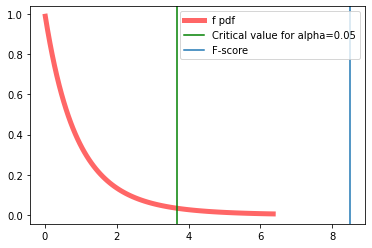

In [ ]:
from scipy.stats import f
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
dfn,dfd = 2,15
x = np.linspace(f.ppf(0.01,dfn,dfd),f.ppf(0.99,dfn,dfd),100)
ax.plot(x,f.pdf(x,dfn,dfd),'r-',lw=5,alpha=0.6,label='f pdf')
plt.axvline(x=3.68, label='Critical value for alpha=0.05', color='g')
plt.axvline(x=fstat, label='F-score')
plt.legend()